4차 방정식 multiple linear regression
y=x**4 + x**3 -4x**2 

In [ ]:
from matplotlib import pyplot 
from autograd import grad
from autograd import numpy

numpy.random.seed(0)
x = numpy.linspace(-3,3,20)
y = x**4 + x**3 -4*x**2 + 8*numpy.random.normal(size=len(x))
#pyplot.scatter(x,y);
print(x)

[-3.         -2.68421053 -2.36842105 -2.05263158 -1.73684211 -1.42105263
 -1.10526316 -0.78947368 -0.47368421 -0.15789474  0.15789474  0.47368421
  0.78947368  1.10526316  1.42105263  1.73684211  2.05263158  2.36842105
  2.68421053  3.        ]


In [ ]:
degree=3

def polynomial_features(x,degree):
  
  X = numpy.empty((len(x), degree+1))
  for i in range(degree+1):
    X[:,i]= x**i
  return X   ##Xw에서 X에 해당하는 부분 값 만들어준 것임

X=polynomial_features(x,degree)
print(X)

multiple linear regression이니까 input 변수들 정규화시키기

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()
X_scaled=min_max_scaler.fit_transform(X)
X_scaled[:,0]=1
print(X_scaled)

In [ ]:
def linear_regression(params, X):
  return numpy.dot(X, params) #식이 바껴서 계속 헷갈린다 ㅠ

def mse_loss(params, model, X, y):
  y_pred = model(params,X)
  return numpy.mean(numpy.sum((y-y_pred)**2))
gradient = grad(mse_loss)


In [ ]:
max_iter = 3000
alpha = 0.01
params = numpy.zeros(X_scaled.shape[1])
#print(params)
descent = numpy.ones(X_scaled.shape[1])
i = 0

from sklearn.metrics import mean_absolute_error

while numpy.linalg.norm(descent) > 0.01 and i < max_iter:
    descent = gradient(params, linear_regression, X_scaled, y)
    params = params - descent * alpha
    loss = mse_loss(params, linear_regression, X_scaled, y)
    mae = mean_absolute_error(y, X_scaled@params)
    if i%100 == 0:
        print("iteration {}, loss = {}, mae = {}".format(i, loss, mae))
    i += 1


In [ ]:
params

array([-22.51572398,   6.75930601,  41.30788709,  30.0105898 ])

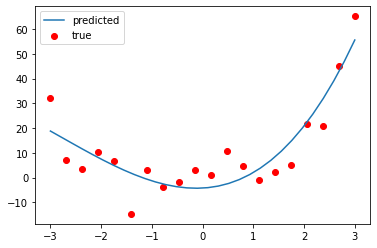

In [ ]:
xgrid = numpy.linspace(x.min(), x.max(),30)
Xgrid_poly_feat = polynomial_features(xgrid, degree)
Xgrid_scaled = min_max_scaler.transform(Xgrid_poly_feat)
Xgrid_scaled[:,0]=1
pyplot.scatter(x,y,c='r',label='true')
pyplot.plot(xgrid,Xgrid_scaled@params, label='predicted')
pyplot.legend();

In [ ]:
from urllib.request import urlretrieve
URL = 'https://raw.githubusercontent.com/engineersCode/EngComp6_deeplearning/master/scripts/plot_helpers.py'
urlretrieve(URL, 'plot_helpers.py')

('plot_helpers.py', <http.client.HTTPMessage at 0x7fb82ac1e6d0>)

In [ ]:
from plot_helpers import interact_polyreg

max_degree = 15
interact_polyreg(max_degree, x, y)


##underfitting degree =1, 직선 방정식-> bias 커짐: 예측값과 실제값 사이의 거리가 멀어진다
#높은 variance : 예측값들이 한 군데로 몰려 있음(직선 위 방정식 값들이 예측값-일정하다)
# overfitting degree = 15 모든 training data와 matching하는 15차 방정식
#low bias, high variance
#예측 값들이 너무 퍼져있는것도 좋지 않다

interactive(children=(IntSlider(value=8, description='degree', max=15, min=1), Output()), _dom_classes=('widge…

=>최종: Regularizaiton
overfitting을 막는 방법,
=람다 regularization parameter를 넣어준다

In [ ]:
def regularized_loss(params, model, X, y ,_lambda=1.0):
  y_pred = model(params, X)
  return numpy.mean( numpy.sum((y-y_pred)**2)) + _lambda*numpy.sum( params[1:]**2)
gradient=grad(regularized_loss)

In [ ]:
no_regularization_params= params.copy()

In [ ]:
max_iter = 3000
alpha = 0.01
params = numpy.zeros(X_scaled.shape[1])
descent= numpy.ones(X_scaled.shape[1])
i = 0

from sklearn.metrics import mean_absolute_error

while numpy.linalg.norm(descent) > 0.01 and i < max_iter:
  descent = gradient(params, linear_regression, X_scaled, y)
  params = params - descent * alpha
  loss = mse_loss(params, linear_regression, X_scaled, y)
  mae = mean_absolute_error(y,X_scaled@params)
  if i%100 == 0:
    print("iteration {}, loss = {}, mae = {}".format(i, loss, mae))
  i+=1

iteration 0, loss = 5434.767518111348, mae = 11.05718775676392
iteration 100, loss = 1785.9852202374184, mae = 6.983886996350374
iteration 200, loss = 1764.2597057711018, mae = 6.966518785947395
iteration 300, loss = 1763.5702631188328, mae = 6.965728405272657


weights without regularization
[-22.51572398   6.75930601  41.30788709  30.0105898 ]
weights with regularization
[-11.13750882  12.48522096  28.26626633  11.09211867]


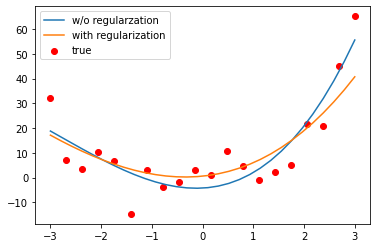

In [ ]:
print('weights without regularization')
print(no_regularization_params)
print('weights with regularization')
print(params)

pyplot.scatter(x,y,c='r', label='true')
pyplot.plot(xgrid, Xgrid_scaled@no_regularization_params, label='w/o regularzation')
pyplot.plot(xgrid, Xgrid_scaled@params, label='with regularization')
pyplot.legend();